In [1]:
library(tidyverse)
library(ggplot2)
library(ggthemes)
library(patchwork)
library(ggsci)
library(ggvenn)
library(ComplexHeatmap)
library(RColorBrewer)
library(ggbeeswarm)
library(tidyr)
library(circlize)
library(fastcluster)
library(magick)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: grid

ComplexHeatmap version 2.20.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformati

ERROR: Error in library(magick): there is no package called ‘magick’


In [ ]:
install.packages("BiocManager")
BiocManager::install("ComplexHeatmap")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.19 (BiocManager 1.30.25), R 4.4.1 (2024-06-14)

Installing package(s) 'ComplexHeatmap'

also installing the dependencies ‘shape’, ‘rjson’, ‘iterators’, ‘circlize’, ‘GetoptLong’, ‘clue’, ‘GlobalOptions’, ‘foreach’, ‘doParallel’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Old packages: 'abind', 'askpass', 'bit', 'bit64', 'bitops', 'boot', 'broom',
  'caTools', 'commonmark', 'cpp11', 'curl', 'data.table', 'digest',
  'dotCall64', 'dqrng', 'evaluate', 'fastDummies', 'FNN', 'fontawesome', 'fs',
  'future.apply', 'GenomicRanges', 'ggrepel', 'glue', 'gplots', 'gtable',
  'hexbin', 'httr2', 'igraph', 'jsonlite', 'knitr', 'MASS', 'Matrix',
  'matrixStats', 'nlme'

In [ ]:
# install.packages("fastcluster")
install.packages("magick")
# install.packages("ggbeeswarm")
# install.packages("ggvenn")
# install.packages("ggthemes")
# install.packages("ggsci")
# install.packages("ComplexHeatmap")

Warning message in install.packages("magick"):
“installation of package ‘magick’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
setwd("/scratch/sah2p/datasets/GSE131907")

## 1. Attribution score top20 gene

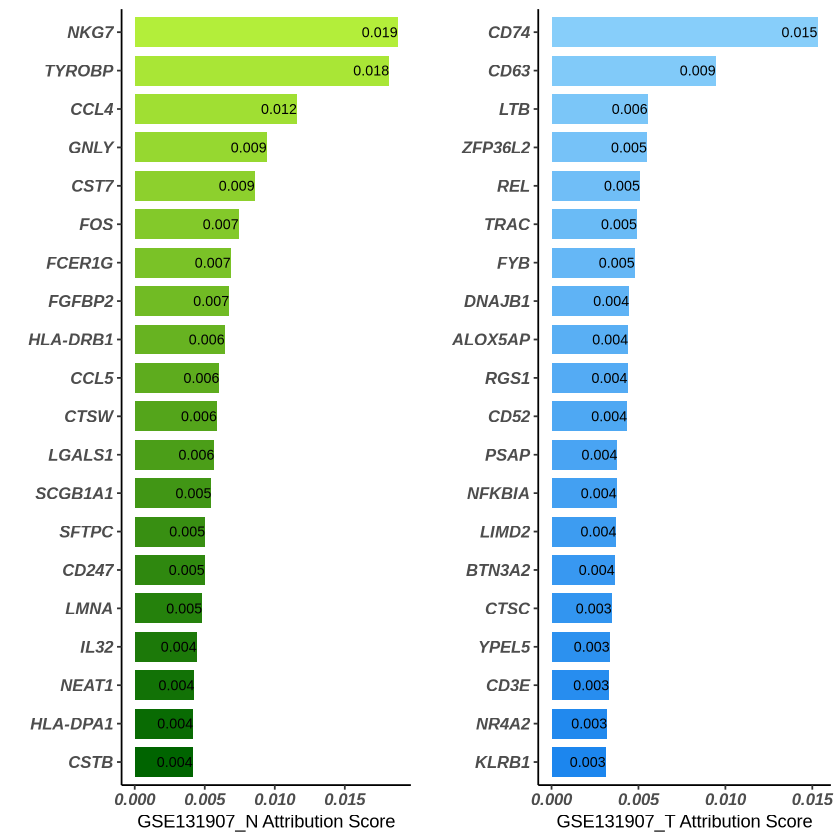

In [ ]:
GSE131907_N = read.table('./Analysis_result/Attr_result/attr_N_PHASE.csv', header = TRUE,  sep = ',',  stringsAsFactors = FALSE)
GSE131907_N = subset(GSE131907_N[,-1])
GSE131907_N <- GSE131907_N[order(GSE131907_N$attr_value, decreasing = TRUE),]
N_top20 <- GSE131907_N[1:20, ]
colors <- colorRampPalette(c("#B3EE3A","#006400"))(20)#
p1 = ggplot(N_top20, mapping = aes(x = reorder(gene_name,attr_value), y = attr_value)) +
  geom_bar(stat = 'identity',fill=colors,width=0.78,position =position_dodge(0.7)) +
  labs(x= " ",y="GSE131907_N Attribution Score", fill = "gene_name",size=8,family = "sans", face = "bold.italic") +
  coord_flip()+
  geom_text(aes(label = sprintf("%.3f",attr_value)),size =3,hjust = ifelse(N_top20$attr_value < 0,0,1))+
  scale_fill_manual(name = "Gene",values = colors) +
  theme_classic() +
  theme(axis.text = element_text(family = "sans",size = 10, face = "bold.italic"))
# ggsave('./Plot/top20_N.png',p1,width =6,height=8)

GSE131907_T = read.table('./Analysis_result/Attr_result/attr_T_PHASE.csv', header = TRUE,  sep = ',',  stringsAsFactors = FALSE)
GSE131907_T = subset(GSE131907_T[,-1])
GSE131907_T <- GSE131907_T[order(GSE131907_T$attr_value, decreasing = TRUE),]
T_top20 <- GSE131907_T[1:20, ]
colors <- colorRampPalette(c("#87CEFA","#1C86EE"))(20)#
p2 = ggplot(T_top20, mapping = aes(x = reorder(gene_name,attr_value), y = attr_value)) +
  geom_bar(stat = 'identity',fill=colors,width=0.78,position =position_dodge(0.7)) +
  labs(x= " ",y="GSE131907_T Attribution Score", fill = "gene_name",size=8,family = "sans", face = "bold.italic") +
  coord_flip()+
  geom_text(aes(label = sprintf("%.3f",attr_value)),size =3,hjust = ifelse(T_top20$attr_value < 0,0,1))+
  scale_fill_manual(name = "Gene",values = colors) +
  theme_classic() +
  theme(axis.text = element_text(family = "sans",size = 10, face = "bold.italic"))
# ggsave('./Plot/top20_T.png',p1,width =6,height=8)

# covid_M = read.table('./Analysis_resultAttr_result/attr_M_PHASE.csv', header = TRUE,  sep = ',',  stringsAsFactors = FALSE)
# covid_M = subset(covid_M[,-1])
# covid_M <- covid_M[order(covid_M$attr_value, decreasing = TRUE),]
# M_top20 <- covid_M[1:20, ]
# colors <- colorRampPalette(c("#87CEFA","#1C86EE"))(20)#
# p2 <- ggplot(M_top20, mapping = aes(x = reorder(gene_name,attr_value), y = attr_value)) +
#   geom_bar(stat = 'identity',fill=colors,width=0.78,position =position_dodge(0.7)) +
#   labs(x= " ",y="Covid19_M Attribution Score", fill = "gene_name",size=8,family = "sans", face = "bold.italic") +
#   coord_flip()+
#   geom_text(aes(label = sprintf("%.3f",attr_value)),size =3,hjust = ifelse(M_top20$attr_value < 0,0,1))+
#   scale_fill_manual(name = "Gene",values = colors) +
#   theme_classic() +
#   theme(axis.text = element_text(family = "sans",size = 10, face = "bold.italic"))
# #ggsave('./plot/top20_M.png',p2,width =6,height=8)

# covid_S = read.table('./Analysis_result/Attr_result/attr_S_PHASE.csv', header = TRUE,  sep = ',',  stringsAsFactors = FALSE)
# covid_S = subset(covid_S[,-1])
# covid_S <- covid_S[order(covid_S$attr_value, decreasing = TRUE),]
# S_top20 <- covid_S[1:20, ]
# colors <- colorRampPalette(c("#FFD700","#EE7942"))(20)#
# p3 <- ggplot(S_top20, mapping = aes(x = reorder(gene_name,attr_value), y = attr_value)) +
#   geom_bar(stat = 'identity',fill=colors,width=0.78,position =position_dodge(0.7)) +
#   labs(x= " ",y="Covid19_S Attribution Score", fill = "gene_name",size=8,family = "sans", face = "bold.italic") +
#   coord_flip()+
#   geom_text(aes(label = sprintf("%.3f",attr_value)),size =3,hjust = ifelse(S_top20$attr_value < 0,0,1))+
#   scale_fill_manual(name = "Gene",values = colors) +
#   theme_classic() +
#   theme(axis.text = element_text(family = "sans",size = 10, face = "bold.italic"))
# #ggsave('./plot/top20_S.png',p3,width =6,height=8)

library(gridExtra)
g <- grid.arrange(p1, p2, ncol = 2)

ggsave('./Plot/Attr_plot/top20_all.pdf',g,width =18,height=8)


## 2. venn plot of H-M-S

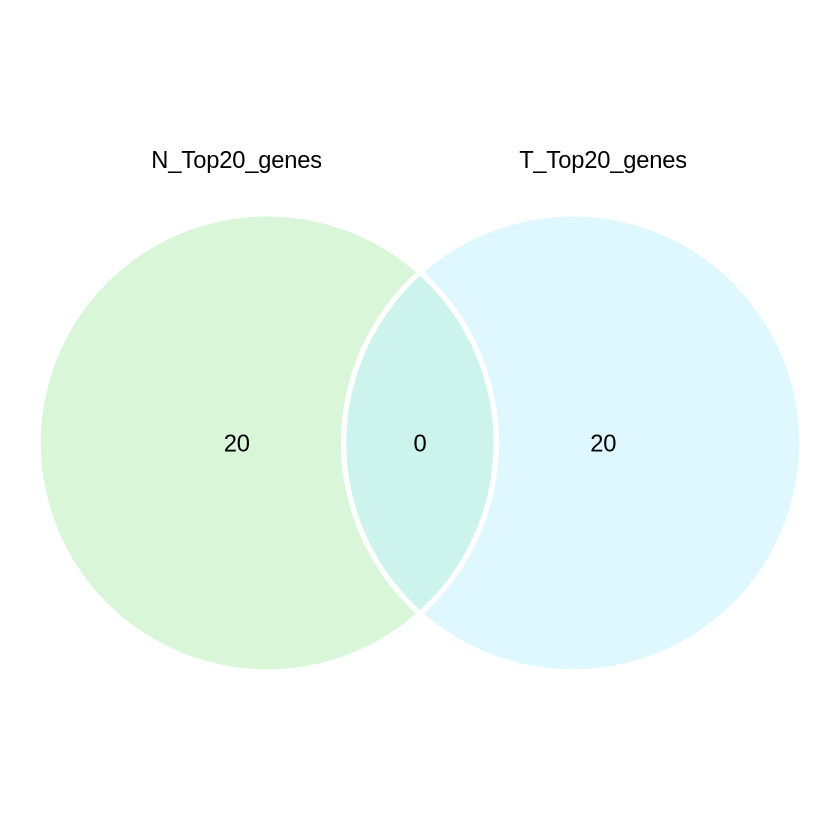

In [ ]:
GSE131907_N = read.table('./Analysis_result/Attr_result/attr_N_PHASE.csv', header = TRUE,  sep = ',',  stringsAsFactors = FALSE)
GSE131907_N = subset(GSE131907_N[,-1])
GSE131907_N <- GSE131907_N[order(GSE131907_N$attr_value, decreasing = TRUE),]
N_genes <- GSE131907_N[1:20, 1]
GSE131907_T = read.table('./Analysis_result/Attr_result/attr_T_PHASE.csv', header = TRUE,  sep = ',',  stringsAsFactors = FALSE)
GSE131907_T = subset(GSE131907_T[,-1])
GSE131907_T <- GSE131907_T[order(GSE131907_N$attr_value, decreasing = TRUE),]
T_genes <- GSE131907_T[1:20, 1]


# covid_M = read.table('./Analysis_result/Attr_result/attr_M_PHASE.csv', header = TRUE,  sep = ',',  stringsAsFactors = FALSE)
# covid_M = subset(covid_M[,-1])
# covid_M <- covid_M[order(covid_M$attr_value, decreasing = TRUE),]
# M_genes <- covid_M[1:20, 1]
# covid_S = read.table('./Analysis_result/Attr_result/attr_S_PHASE.csv', header = TRUE,  sep = ',',  stringsAsFactors = FALSE)
# covid_S = subset(covid_S[,-1])
# covid_S <- covid_S[order(covid_S$attr_value, decreasing = TRUE),]
# S_genes <- covid_S[1:20, 1]
dat = list(N_Top20_genes=N_genes, T_Top20_genes=T_genes)
p1 <- ggvenn(dat,show_percentage = F,stroke_color = "white",stroke_size = 1.5,
             fill_color = c("#B4EEB4", "#BFEFFF"),
             set_name_size = 5,text_size=5)
p1
ggsave("./Plot/Attr_plot/ggvenn_top20.pdf", p1, width=5, height=5)

unique_T_genes <- setdiff(T_genes, N_genes)
unique_N_genes <- setdiff(T_genes, N_genes)

# max_length <- max(length(unique_T_genes), length(unique_N_genes))
# # unique_H_genes <- c(unique_H_genes, rep(NA, max_length - length(unique_H_genes)))
# # unique_M_genes <- c(unique_M_genes, rep(NA, max_length - length(unique_M_genes)))
# # unique_S_genes <- c(unique_S_genes, rep(NA, max_length - length(unique_S_genes)))

gene_unique <- data.frame(T=unique_T_genes, N=unique_N_genes)
write.csv(gene_unique, file = "./Plot/Attr_plot/unique_Topgenes_venn.csv", row.names = FALSE)


## 3. Heatmap of top20 gene attribution score

In [ ]:
combined_genes <- union(union(T_top20$gene_name, N_top20$gene_name))
unique_genes <- unique(combined_genes)

data = read.csv('./Analysis_result/Attr_result/attr_sample_PHASE.csv',row.names = 1)
selected_columns <- names(data) %in% unique_genes
all_top20 = data[, selected_columns, drop = FALSE]
all_top20 = as.matrix(all_top20)
all_top20 <- apply(all_top20, 2, function(x) (x - min(x)) / (max(x) - min(x)))
all_top20

condition = read.csv('./COVID19_sample_condition_560.csv')
rownames(condition) <- gsub("\\.", "_", rownames(condition))
dict1 <- setNames(condition$group, condition$sample_id)
dict2 <- setNames(condition$Source, condition$sample_id)

group = c()
dataset = c()
for (i in seq_along(row.names(all_top20))){
  row_name <- row.names(all_top20)[i]
  g <- dict1[row_name]
  group[i] <- g
  d <- dict2[row_name]
  dataset[i] <- d
  }
df <- data.frame(group, dataset)
expData = t(scale(t(all_top20)))
expData = pmax(pmin(expData,2),-2)

col_fun = colorRamp2(c(-2,-1,0,1,2),rev(brewer.pal(n = 5, name = "RdBu")))

left_ha = rowAnnotation(Cluster = df$group,Dataset = df$dataset, simple_anno_size = unit(8,'points'),
                        col = list(Cluster = c("H" = '#66DD00',"M"="#77DDFF","S"="#FFBB66"),
                                   Dataset = c("Arunachalam_2020"="#377EB8","COMBAT_2022"="darkorchid1","Combes_2021"="#A6D854",
                                               "Liu_2021"="#66C2A5","Ren_2021"="#0000C6","Schulte-Schrepping_2020"="khaki2",
                                               "Schuurman_2021"="#4DAF4A","Stephenson_2021"="#999999","Unterman_2022"="#984EA3",
                                               "Wilk_2021"="#E5C494","Zhao_2021"="#E41A1C","Zhu_2020"="#8DA0CB")),
                        show_annotation_name = F)

fh = function(x) fastcluster::hclust(dist(x),"ave")

pdf('./Plot/Attr_plot/heatmap_attr_ave.pdf',width = 6,height = 6)
Heatmap(expData,
        show_row_names = F,show_column_names = F,
        show_row_dend = T,show_column_dend = T,
        cluster_rows = fh,cluster_columns = fh,
        col = col_fun,
        row_title = NULL,column_title = NULL,
        heatmap_legend_param = list(title = ''),
        top_annotation = NULL,
        left_annotation = left_ha,
        right_annotation = NULL,
        use_raster = TRUE, raster_quality = 2)
dev.off()

## 4. Heatmap of top20 gene expression level

In [ ]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import scipy.sparse

os.chdir("/scratch/sah2p/datasets/GSE131907")

In [ ]:
sce = sc.read_h5ad("./Alldata_hvg.h5ad")

from scipy.sparse import csr_matrix, isspmatrix_csr

# Check if 'counts' is a dense numpy array or sparse matrix
counts_layer = sce.layers['counts']

if isinstance(counts_layer, np.ndarray):  # Convert dense matrix to CSR format
    raw_matrix = csr_matrix(counts_layer)
elif not isspmatrix_csr(counts_layer):  # Ensure it's in CSR format if sparse
    raw_matrix = counts_layer.tocsr()
else:
    raw_matrix = counts_layer


raw_df = pd.DataFrame(
        counts_layer,
        index=sce.obs_names,      
        columns=sce.var_names  
)

In [ ]:
raw_df['sample'] = sce.obs['sample'].values
sample_gene_expression = raw_df.groupby('sample').sum()
hvg_genes = sce.var[sce.var['highly_variable']].index.tolist()
hvg_df = sample_gene_expression[hvg_genes]
hvg_df.to_csv("./Analysis_result/Attr_result/exp_sample_PHASE.csv")

In [ ]:
library(tidyverse)
library(ggplot2)
library(ggthemes)
library(patchwork)
library(ggsci)
library(ggvenn)
library(ComplexHeatmap)
library(RColorBrewer)
library(ggbeeswarm)
library(tidyr)
library(circlize)
library(fastcluster)
# library(magick)

setwd("/scratch/sah2p/datasets/GSE131907")

ERROR: Error in library(magick): there is no package called ‘magick’


In [ ]:
GSE131907_N = read.table('./Analysis_result/Attr_result/attr_N_PHASE.csv', header = TRUE,  sep = ',',  stringsAsFactors = FALSE)
GSE131907_N  = subset(GSE131907_N[,-1])
GSE131907_N  <- GSE131907_N[order(GSE131907_N$attr_value, decreasing = TRUE),]
N_top20 <- GSE131907_N[1:20,]

GSE131907_T = read.table('./Analysis_result/Attr_result/attr_T_PHASE.csv', header = TRUE,  sep = ',',  stringsAsFactors = FALSE)
GSE131907_T  = subset(GSE131907_T[,-1])
GSE131907_T  <- GSE131907_T[order(GSE131907_T$attr_value, decreasing = TRUE),]
T_top20 <- GSE131907_T[1:20,]


In [21]:
combined_genes <- union(N_top20$gene_name, T_top20$gene_name)
unique_genes <- unique(combined_genes)
data = read.csv('./Analysis_result/Attr_result/exp_sample_PHASE.csv',row.names = 1)
selected_columns <- names(data) %in% unique_genes
all_top20 = data[, selected_columns, drop = FALSE]
all_top20 = as.matrix(all_top20)
all_top20 <- apply(all_top20, 2, function(x) (x - min(x)) / (max(x) - min(x)))
# all_top20

condition = read.csv('./metadata.csv')  
# condition
# rownames(condition) <- gsub("\\.", "_", rownames(condition))
dict1 <- setNames(condition$phenotype, condition$sample)
# dict2 <- setNames(condition$Source, condition$sample_id)
# for (key in names(dict1)) {
#   value <- dict1[[key]]
#   print(paste("Key:", key, "Value:", value))
# }
group = c()
# # dataset = c()
for (i in seq_along(row.names(all_top20))){
  row_name <- row.names(all_top20)[i]
  g <- dict1[row_name]
  group[i] <- g
  }
  
df <- data.frame(group)

expData = t(scale(t(all_top20)))
expData = pmax(pmin(expData,2),-2)
expData

col_fun = colorRamp2(c(-2,-1,0,1,2),rev(brewer.pal(n = 5, name = "RdBu")))

left_ha = rowAnnotation(Cluster = df$group, simple_anno_size = unit(8,'points'),
                        col = list(Cluster = c("normal" = '#66DD00',"tumour"="#77DDFF"),
                        show_annotation_name = F))

fh = function(x) fastcluster::hclust(dist(x),"ave")

pdf('./Plot/Attr_plot/heatmap_exp_ave.pdf',width = 6,height = 6)
Heatmap(expData,
        show_row_names = F,show_column_names = F,
        show_row_dend = T,show_column_dend = T,
        cluster_rows = fh,cluster_columns = fh,
        col = col_fun,
        row_title = NULL,column_title = NULL,
        heatmap_legend_param = list(title = ''),
        top_annotation = NULL,
        left_annotation = left_ha,
        right_annotation = NULL,
        use_raster = TRUE, raster_quality = 2)
dev.off()

,ALOX5AP,BTN3A2,CCL4,CCL5,CD247,CD3E,CD52,CD63,CD74,CST7,⋯,NR4A2,PSAP,REL,RGS1,SCGB1A1,SFTPC,TRAC,TYROBP,YPEL5,ZFP36L2
N01,-1.0476181,1.57165976,0.78749896,0.38534834,0.00927177,-0.305492666,-0.59485540,-0.8137511,-1.015428873,0.13691841,⋯,2.00000000,-0.473432265,0.3122248,-0.7565225,-0.9017480,-0.651826159,-0.82955919,-0.6668303,-0.757574478,0.08671666
N06,-0.9491789,1.37588784,1.85992493,1.80557696,0.41812525,1.020038326,-0.02940710,-1.1926215,-1.192621523,1.34404857,⋯,0.49660106,-1.129116012,0.1581692,-1.1815894,-0.6682918,0.138056820,0.10286047,-0.7852169,-0.535320428,0.03593428
N08,-0.8425688,0.82260721,0.46750262,0.92711367,1.47802141,0.513762180,0.05842266,-0.9998320,-0.826952515,1.25490166,⋯,-0.42418247,-0.883346358,-0.8875069,-1.1149946,-0.8566509,0.006800165,-0.66102660,-0.6307642,-0.948224000,-0.40198088
N09,-0.4957771,0.37304566,1.21422883,1.08239949,0.59529343,0.591404900,-0.26715123,-0.5984753,-0.879611527,0.50531721,⋯,0.09018107,-1.345095096,-1.3647246,0.2412575,-0.5553304,2.000000000,-0.35917152,-0.5647477,-1.364724647,0.54443532
N18,-1.1313128,0.85396847,-1.90655726,-0.34102384,-0.47164374,0.008034872,-0.81817100,0.2090465,0.564213939,0.72811297,⋯,0.15496771,0.002655176,1.6691369,-2.0000000,1.6314487,-1.486477481,-0.35284855,-1.1513786,-0.439476313,-0.08842095
N19,-0.9292088,1.57876574,1.57876574,0.82744401,1.57876574,0.910478448,-0.91719518,-0.3905444,-0.950593264,1.57876574,⋯,-0.17802329,-0.953796911,-0.4579494,-0.8953897,-1.3598214,-0.866397796,-0.39761625,-0.7726417,-0.845412331,-0.53487686
N20,1.3775159,0.37440888,0.57224722,-0.54715769,-0.43892845,-0.902173310,1.37751587,1.3775159,1.377515872,-0.63751815,⋯,-0.66931404,1.377515872,-0.3993249,-1.6754384,-1.0134316,-0.310708879,-1.46364677,1.3775159,-1.124147007,-0.74909501
N28,-0.6040474,1.53516787,0.89471640,2.00000000,0.64218029,1.472886461,-0.01670688,-0.5294473,-0.788677093,0.63010815,⋯,-0.50188142,-1.007914577,-1.1436841,-0.8753321,-1.2126107,-0.049735117,0.04566641,-0.7564879,-0.712146571,-0.27126217
N30,-1.2136174,-0.88539890,0.03137149,0.82922166,-0.30766404,0.521442237,-0.79513164,-0.9473131,-0.622638022,1.02239058,⋯,1.54800842,-0.764651237,1.4732604,-1.2611537,2.0000000,-0.885317884,-0.81267631,-0.8450022,0.703015354,0.88638393
N31,-1.1301788,-0.03732913,-0.50043475,-0.06048866,-0.68869662,-1.017365131,-0.88460136,0.7628904,0.002508044,-0.06213147,⋯,0.29682628,-0.143472288,0.1604814,-1.3448311,1.7692387,0.228668700,-0.99727851,-0.7343036,-0.532053324,0.12127515


'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



png 
  2